# Page Rank Feature Selection algorithm evaluation

This notebook contains all the experiments that have been done to test the performance of the PageRank Feature Selection algorithm. It is part of the report of the final thesis of Josep Medialdea.

# Imports

In [1]:
import pandas as pd
from prfs.feature_selection import PageRankFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

# Dataset initialization

In [13]:
dataset_name = 'creditcard'
drop_columns = []

dataset = pd.read_csv(f'datasets/{dataset_name}.csv').drop(columns=drop_columns)
features = dataset.iloc[:, 0:-1]
target = dataset.iloc[:,-1]

# Feature selection

In [14]:
prfs_params = {
    'graph':  'feature',
    'alpha':  'accuracy',
    'beta':   'accuracy',
    'weight':  1.0
}

In [15]:
prfs = PageRankFeatureSelector(**prfs_params)
prfs.fit(features, target)
print(prfs.ranking())

RANKING
------
1: V12
2: V16
3: V14
4: V7
5: V6
6: V11
7: V17
8: V3
9: V18
10: V8
11: V10
12: V1
13: V15
14: V21
15: V5
16: V9
17: V2
18: V13
19: V19
20: V4
21: V25
22: V22
23: V24
24: V26
25: V27
26: V20
27: V23
28: V28
29: Time
30: Amount



# Classifier evaluation

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)

accuracy_decision_tree = []
accuracy_naive_bayes = []

for n in range(len(features.columns)):
    clf = DecisionTreeClassifier()
    clf.fit(X_train[prfs.select(n + 1)], y_train)
    accuracy_decision_tree.append(clf.score(X_test[prfs.select(n + 1)], y_test))
    
    clf = GaussianNB()
    clf.fit(X_train[prfs.select(n + 1)], y_train)
    accuracy_naive_bayes.append(clf.score(X_test[prfs.select(n + 1)], y_test))
    

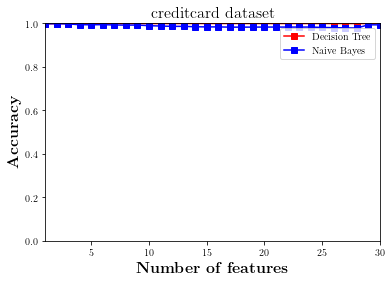

In [17]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'\textbf{Number of features}',fontsize=16)
plt.ylabel(r'\textbf{Accuracy}',fontsize=16)
plt.title(f'{dataset_name} dataset', fontsize=16)
plt.plot(range(1, len(accuracy_decision_tree) + 1), accuracy_decision_tree, marker='s', color='r', label='Decision Tree')
plt.plot(range(1, len(accuracy_naive_bayes) + 1), accuracy_naive_bayes, marker='s', color='b', label='Naive Bayes')
plt.xlim([1, len(features.columns)])
plt.ylim([0, 1])
plt.legend()
plt.show()

# Regressor evaluation

In [161]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)

r2_svm = []

for n in range(len(features.columns)):
    ref = SVR()
    ref.fit(X_train[prfs.select(n + 1)], y_train)
    r2_svm.append(ref.score(X_test[prfs.select(n + 1)], y_test))

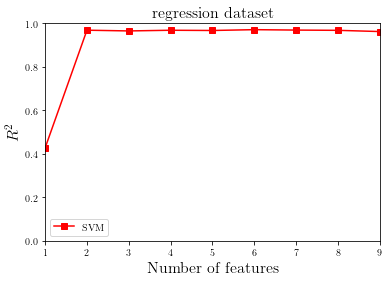

In [167]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'Number of features',fontsize=16)
plt.ylabel(r'\textbf{$R^2$}',fontsize=16)
plt.title(f'{dataset_name} dataset', fontsize=16)
plt.plot(range(1, len(r2_svm) + 1), r2_svm, marker='s', color='r', label='SVM')
plt.xlim([1, len(features.columns)])
plt.ylim([0, 1])
plt.legend()
plt.show()